In [194]:
import numpy as np

In [209]:
import pandas as pd


# Binary imports
mask_wearing_bin = pd.read_csv('../Data/sg_intervention/binary/compulsory_mask.csv')
eat_in_bin = pd.read_csv('../Data/sg_intervention/binary/eat_in_ban.csv')
entry_recording_bin = pd.read_csv('../Data/sg_intervention/binary/entry_recording.csv')
lockdown_bin = pd.read_csv('../Data/sg_intervention/binary/lockdown.csv')
sch_closure_bin = pd.read_csv('../Data/sg_intervention/binary/sch_closure.csv')

bin_vars = [mask_wearing_bin,
            eat_in_bin,
            entry_recording_bin,
            lockdown_bin,
            sch_closure_bin]

# Non binary imports
gathering_max = pd.read_csv('../Data/sg_intervention/non_binary/gathering_max.csv')
mall_distancing = pd.read_csv('../Data/sg_intervention/non_binary/mall_distancing.csv')
recreations = pd.read_csv('../Data/sg_intervention/non_binary/recreation.csv')
workplace_closure = pd.read_csv('../Data/sg_intervention/non_binary/workplace_closure.csv')
worship = pd.read_csv('../Data/sg_intervention/non_binary/worship.csv')

cont_vars = [gathering_max,
            mall_distancing,
            recreations,
            workplace_closure,
            worship]

 Convert all to datetime

In [210]:
start_date = pd.to_datetime('2020-01-23')
end_date = pd.to_datetime('2021-08-18')

def generate_date_df(start_date, end_date):
    template_date_range = pd.DataFrame(pd.date_range(start_date, end_date))
    template_date_range.columns = ['Date']
    return template_date_range

In [211]:
template_date_range = generate_date_df(start_date, end_date)

In [212]:
def arrange_start_end(date_list):
    p = []
    for i in range(0, len(date_list),2):
        p.append((date_list[i], date_list[i+1]))
    
    return p

In [213]:
bin_vars_proc = []
for df in bin_vars:
    df = df.iloc[:,1::]
    df_col_name = df.columns[0]
    df['Date'] = pd.to_datetime(df[df_col_name])
    df = df[['Date']]
    df[df_col_name] = 1
    bin_vars_proc.append(df)


bin_vars_proc_final = []
for df in bin_vars_proc:
    switch_dates = df['Date'].values
    temp_df = generate_date_df(start_date, end_date)
    temp_df[df.columns[-1]] = 0
    
    if len(switch_dates) == 1:
        start_date_measure = switch_dates[0]
        temp_df.loc[temp_df['Date']>=start_date_measure,df.columns[-1]] = 1
    
    
    else:
        
        for d_pair in arrange_start_end(switch_dates):
            temp_df.loc[(temp_df['Date']>=d_pair[0]) & (temp_df['Date']<=d_pair[1]), df.columns[-1]] = 1
        #for date in switch_dates:
    
    bin_vars_proc_final.append(temp_df)

Non Binary Vars

In [214]:
cont_vars_proc = []
for df in cont_vars:
    df = df.iloc[:,1:]
    feat_name = df.columns[0]
    df.columns = ['Date', feat_name]
    df['Date'] = pd.to_datetime(df['Date'], dayfirst=True)
    temp_df = generate_date_df(start_date, end_date)
    temp_df = temp_df.merge(df, on='Date', how='left')
    temp_df = temp_df.ffill()
    cont_vars_proc.append(temp_df)

In [215]:
NPIS_proc = pd.concat(bin_vars_proc_final + cont_vars_proc, 1)

In [216]:
feat_cols = [x for x in NPIS_proc.columns if x != 'Date']
dates = NPIS_proc['Date'].iloc[:,0]
NPIS_proc = NPIS_proc[feat_cols]
NPIS_proc['Date'] = dates

In [217]:
NPIS_proc = NPIS_proc.set_index("Date")
NPIS_proc = NPIS_proc.reset_index()

In [218]:
NPIS_proc

,Date,Compulsory_Mask,Eat_In_Ban,Entry_Recording,Lockdown,Sch_Closure,Gathering_Max,Mall_Distancing,Recreation,Workplace_Closure,Worship
0,2020-01-23,0,0,0,0,0,150.0,1.15,1.00,1.00,1.00
1,2020-01-24,0,0,0,0,0,150.0,1.15,1.00,1.00,1.00
2,2020-01-25,0,0,0,0,0,150.0,1.15,1.00,1.00,1.00
3,2020-01-26,0,0,0,0,0,150.0,1.15,1.00,1.00,1.00
4,2020-01-27,0,0,0,0,0,150.0,1.15,1.00,1.00,1.00
...,...,...,...,...,...,...,...,...,...,...,...
569,2021-08-14,1,1,1,0,0,2.0,10.00,0.25,0.33,0.25
570,2021-08-15,1,1,1,0,0,2.0,10.00,0.25,0.33,0.25
571,2021-08-16,1,1,1,0,0,2.0,10.00,0.25,0.33,0.25
572,2021-08-17,1,1,1,0,0,2.0,10.00,0.25,0.33,0.25


In [219]:
NPIS_proc.to_csv('data/NPIS_LC_processed.csv')

# Edit Variables such that increase -> More lockdown
- Means all coefficients should be negative, as lockdown measures increase r_t should fall

### List of Variables
- Compulsory Mask -> 0 no mask/ 1 mask (Correct)
- Eat in Ban -> 0 no ban / 1 ban (Correct)
- Entry Recording -> 0 no record / 1 record (Correct)
- Lockdown -> 0 no lockdown / 1 lockdown (corret)
- Sch_close -> 0 no closure / 1 closure (correct)
- Gathering_Max -> decrease -> more strict (wrong)
- Mall Distancing -> increase -> more strict (correct)
- Recreation -> decrease -> more strict (wrong)
- Workplace closure -> decrease -> more strict (wrong)
- worship -> decrease -> more strict (wrong)

Convert all to 0 - 1 range

In [183]:
from sklearn.preprocessing import MinMaxScaler

In [184]:
non_bin_vars_cols = list(NPIS_proc.iloc[:,6:].columns)
NPIS_proc_rescaled = NPIS_proc.copy()
NPIS_proc_rescaled.loc[NPIS_proc_rescaled['Gathering_Max']==150,'Gathering_Max'] = 10

for col in non_bin_vars_cols:
    new_features = MinMaxScaler().fit_transform(NPIS_proc_rescaled[col].values.reshape(-1,1))
    NPIS_proc_rescaled[col] = new_features

In [185]:
non_bin_vars_cols

['Gathering_Max',
 'Mall_Distancing',
 'Recreation',
 'Workplace_Closure',
 'Worship']

Simple way is to set variables to negative

In [190]:
vars_to_reverse = ['Gathering_Max','Recreation','Workplace_Closure','Worship']
for v in vars_to_reverse:
    NPIS_proc_rescaled[v] = -1*NPIS_proc_rescaled[v]

In [191]:
NPIS_proc_rescaled

,Date,Compulsory_Mask,Eat_In_Ban,Entry_Recording,Lockdown,Sch_Closure,Gathering_Max,Mall_Distancing,Recreation,Workplace_Closure,Worship
0,2020-01-23,0,0,0,0,0,-1.0,0.000000,-1.00,-1.00,-1.00
1,2020-01-24,0,0,0,0,0,-1.0,0.000000,-1.00,-1.00,-1.00
2,2020-01-25,0,0,0,0,0,-1.0,0.000000,-1.00,-1.00,-1.00
3,2020-01-26,0,0,0,0,0,-1.0,0.000000,-1.00,-1.00,-1.00
4,2020-01-27,0,0,0,0,0,-1.0,0.000000,-1.00,-1.00,-1.00
...,...,...,...,...,...,...,...,...,...,...,...
569,2021-08-14,1,1,1,0,0,-0.2,0.286872,-0.25,-0.33,-0.25
570,2021-08-15,1,1,1,0,0,-0.2,0.286872,-0.25,-0.33,-0.25
571,2021-08-16,1,1,1,0,0,-0.2,0.286872,-0.25,-0.33,-0.25
572,2021-08-17,1,1,1,0,0,-0.2,0.286872,-0.25,-0.33,-0.25


Create index

In [204]:
lockdown_vals = np.mean(NPIS_proc_rescaled.iloc[:,1:], 1)
lockdown_index = NPIS_proc_rescaled[['Date']]
lockdown_index['Lockdown_index'] = lockdown_vals

<ipython-input-204-1e29d71aea94>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lockdown_index['Lockdown_index'] = lockdown_vals


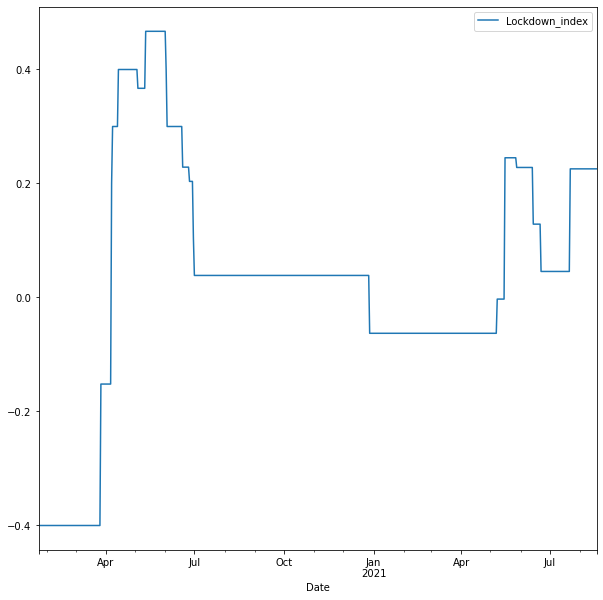

In [205]:
lockdown_index.plot(x='Date', y='Lockdown_index', figsize=(10,10))

In [222]:
NPIS_proc_rescaled.to_csv('data/NPIS_LC_processed_V2.csv')
lockdown_index.to_csv('data/lockdown_index.csv')

In [223]:
NPIS_proc_rescaled

,Date,Compulsory_Mask,Eat_In_Ban,Entry_Recording,Lockdown,Sch_Closure,Gathering_Max,Mall_Distancing,Recreation,Workplace_Closure,Worship
0,2020-01-23,0,0,0,0,0,-1.0,0.000000,-1.00,-1.00,-1.00
1,2020-01-24,0,0,0,0,0,-1.0,0.000000,-1.00,-1.00,-1.00
2,2020-01-25,0,0,0,0,0,-1.0,0.000000,-1.00,-1.00,-1.00
3,2020-01-26,0,0,0,0,0,-1.0,0.000000,-1.00,-1.00,-1.00
4,2020-01-27,0,0,0,0,0,-1.0,0.000000,-1.00,-1.00,-1.00
...,...,...,...,...,...,...,...,...,...,...,...
569,2021-08-14,1,1,1,0,0,-0.2,0.286872,-0.25,-0.33,-0.25
570,2021-08-15,1,1,1,0,0,-0.2,0.286872,-0.25,-0.33,-0.25
571,2021-08-16,1,1,1,0,0,-0.2,0.286872,-0.25,-0.33,-0.25
572,2021-08-17,1,1,1,0,0,-0.2,0.286872,-0.25,-0.33,-0.25


In [ ]:
owid = pd.read_csv('../Data/owid-covid-data.csv')
singapore_testing = owid[owid['location']=='Singapore']
singapore_testing = singapore_testing[~singapore_testing['total_tests'].isna()][['date',
                                                                                 'total_tests',
                                                                                 'new_tests',
                                                                                 'positive_rate',
                                                                                 'tests_per_case']]

In [161]:
ord(let)

120

In [168]:
(chr(0))

'\x00'

In [ ]:
[925266158579838976
1149274148126023681
1263865769982668800
1308773286009081858
4092546077
165015015
1071439447097524224
748439937939312640
1255511980451991568
1311312676753158147
1299399375978979329
1400619084
1681466581
862938119997456384
916048106
4829163329
1080735155617230848
1181945552369569795
1281849589738491905
1296860131704143874
2991635788
1314843035902115841
1011118319502594048
1101107866801524737
